<a href="https://colab.research.google.com/github/manishsahu001/AI-ML-DL/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# to ignore the warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("insurance_data.csv")

# EDA

In [ ]:
# Checking the shape of the dataset
df.shape

(3011, 7)

In [ ]:
# Check the data structure
df.head()

,age,sex,bmi,children,smoker,region,charges
0,36,male,28.14,2,yes,northwest,20599.93
1,45,male,41.61,2,no,southeast,8918.79
2,30,male,38.54,1,no,northwest,7125.91
3,38,male,23.79,4,yes,southeast,27342.97
4,50,female,35.08,2,no,northwest,7190.31


In [ ]:
# Check all the information aboout data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3011 entries, 0 to 3010
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3011 non-null   int64  
 1   sex       3011 non-null   object 
 2   bmi       3011 non-null   float64
 3   children  3011 non-null   int64  
 4   smoker    3011 non-null   object 
 5   region    3011 non-null   object 
 6   charges   3011 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 164.8+ KB


In [ ]:
# Get stats data
df.describe()

,age,bmi,children,charges
count,3011.000000,3011.000000,3011.000000,3011.000000
mean,41.499502,31.296227,2.517436,17676.608412
std,13.918925,7.847524,1.706138,10981.195227
min,18.000000,18.010000,0.000000,4128.190000
25%,29.000000,24.480000,1.000000,7694.005000
50%,41.000000,31.320000,3.000000,13284.980000
75%,53.000000,38.020000,4.000000,27033.895000
max,65.000000,44.990000,5.000000,49407.820000


In [ ]:
# Checking if any null values are there in dataset or not
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

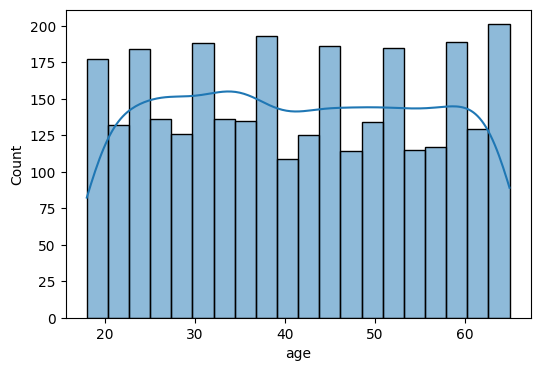

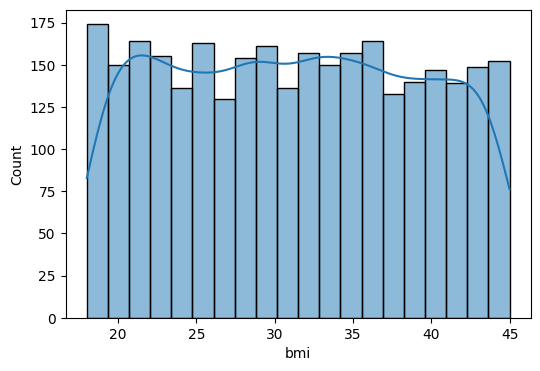

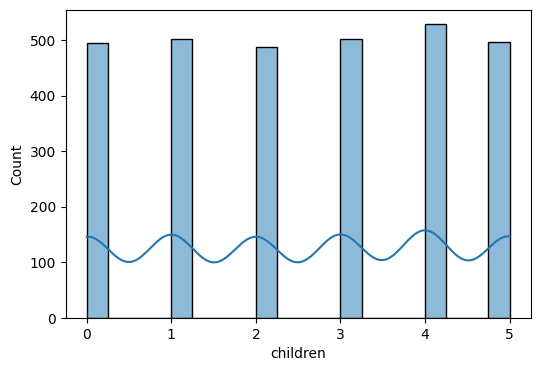

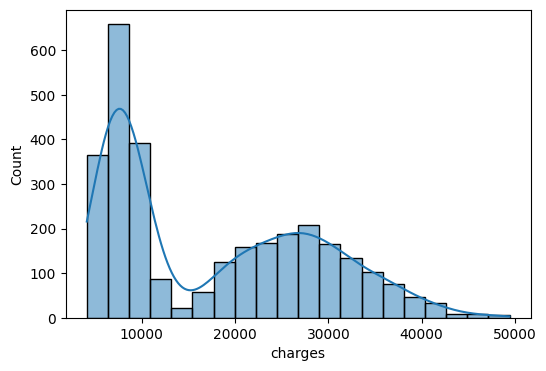

In [ ]:
# Getting numeric columns only and storing in a list, to verify the distribution
numeric_columns = ['age', 'bmi', 'children', 'charges']
for col in numeric_columns:
  plt.figure(figsize=(6, 4))
  sns.histplot(df[col], kde=True, bins=20)

<Axes: xlabel='children', ylabel='count'>

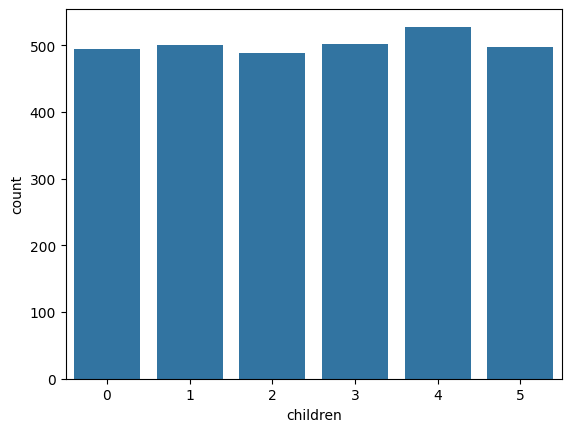

In [ ]:
sns.countplot(x=df['children'])

<Axes: xlabel='sex', ylabel='count'>

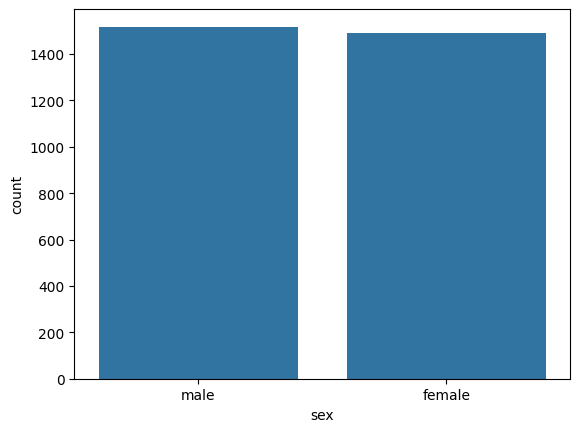

In [ ]:
sns.countplot(x = df['sex'])

<Axes: xlabel='smoker', ylabel='count'>

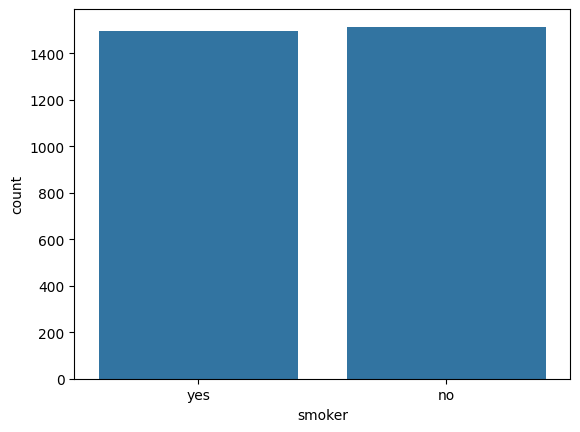

In [ ]:
sns.countplot(x = df['smoker'])

<Axes: xlabel='region', ylabel='count'>

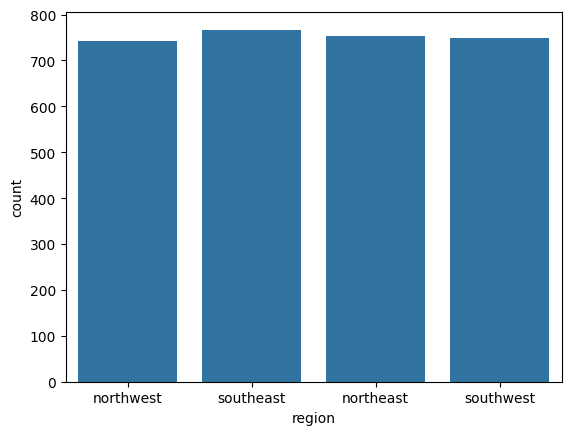

In [ ]:
sns.countplot(x = df['region'])

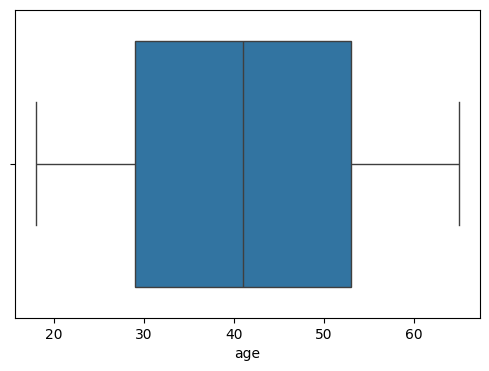

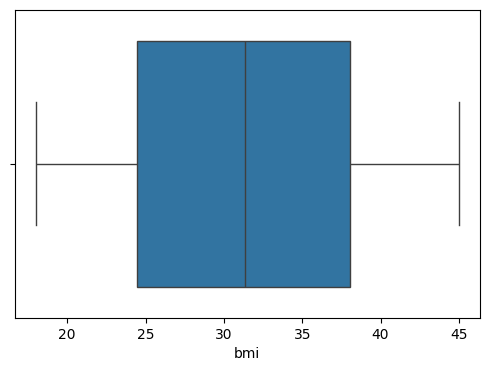

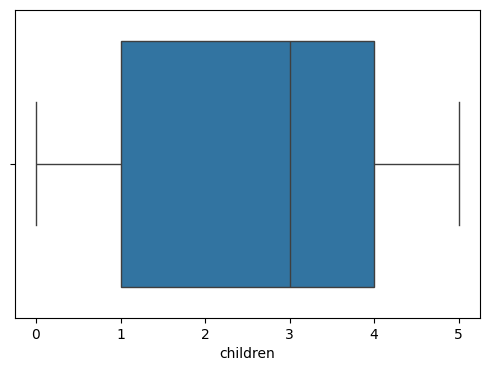

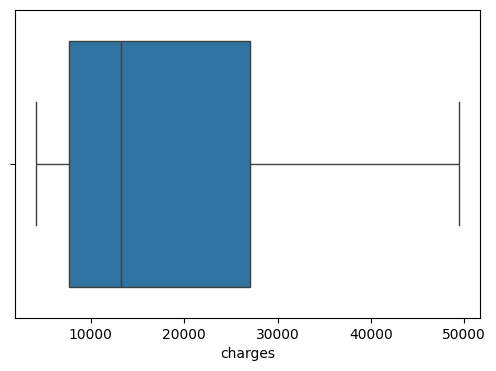

In [ ]:
for col in numeric_columns:
  plt.figure(figsize=(6, 4))
  sns.boxplot(x=df[col])

<Axes: >

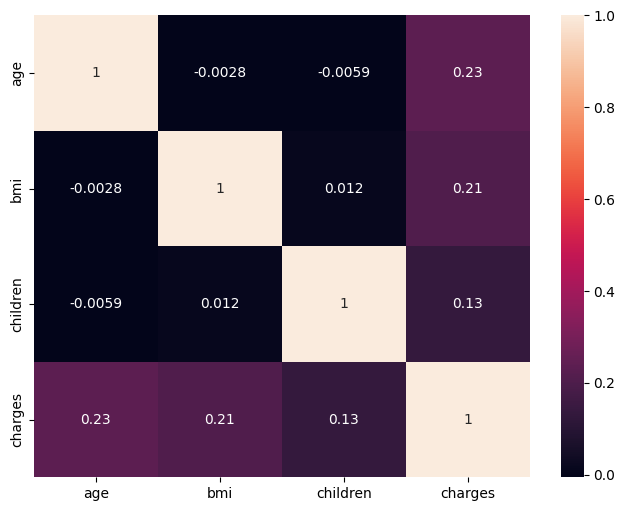

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True)

# Data cleaning and Preprocessing

In [ ]:
# Create a copy of original data
df_cleaned = df.copy()

In [ ]:
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,36,male,28.14,2,yes,northwest,20599.93
1,45,male,41.61,2,no,southeast,8918.79
2,30,male,38.54,1,no,northwest,7125.91
3,38,male,23.79,4,yes,southeast,27342.97
4,50,female,35.08,2,no,northwest,7190.31
...,...,...,...,...,...,...,...
3006,53,female,21.06,3,yes,southeast,26996.45
3007,31,male,28.42,2,yes,southeast,17802.71
3008,55,female,42.36,1,yes,northeast,32727.74
3009,43,male,44.22,3,yes,northeast,41999.02


In [ ]:
# checking null values
df_cleaned.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
df_cleaned.shape

(3011, 7)

In [ ]:
# find and remove duplicates
df_cleaned.drop_duplicates(inplace=True)

In [ ]:
df_cleaned.shape

(3000, 7)

In [ ]:
# Checking the datatypes
df_cleaned.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [ ]:
# we need to verify the count of the value so that we can clean the data properly also to make it consistent like male, Male, MALE these all are treated as different
df_cleaned.value_counts('sex')

,count
sex,
male,1512
female,1488


In [ ]:
# Label mapping to conver the gender into 0 and 1, encoding the data
df_cleaned['sex'] = df_cleaned['sex'].map({"male": 0, "female": 1})

In [ ]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,36,0,28.14,2,yes,northwest,20599.93
1,45,0,41.61,2,no,southeast,8918.79
2,30,0,38.54,1,no,northwest,7125.91
3,38,0,23.79,4,yes,southeast,27342.97
4,50,1,35.08,2,no,northwest,7190.31


In [ ]:
df_cleaned['smoker'].value_counts()

,count
smoker,
no,1512
yes,1488


In [ ]:
# label encoding for the smoker column
df_cleaned['smoker'] = df_cleaned['smoker'].map({"yes": 1, "no": 0})

In [ ]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,36,0,28.14,2,1,northwest,20599.93
1,45,0,41.61,2,0,southeast,8918.79
2,30,0,38.54,1,0,northwest,7125.91
3,38,0,23.79,4,1,southeast,27342.97
4,50,1,35.08,2,0,northwest,7190.31


In [ ]:
# renaming columns sex and smoker
df_cleaned.rename(columns={
    "sex": "is_female",
    "smoker": "is_smoker"
}, inplace=True)

In [ ]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,36,0,28.14,2,1,northwest,20599.93
1,45,0,41.61,2,0,southeast,8918.79
2,30,0,38.54,1,0,northwest,7125.91
3,38,0,23.79,4,1,southeast,27342.97
4,50,1,35.08,2,0,northwest,7190.31


In [ ]:
df_cleaned['region'].value_counts()

,count
region,
southeast,763
northeast,748
southwest,747
northwest,742


In [ ]:
# One-hot encoding
# Getting copy of each column in teh sheet.  drop_first true mean ignore the region colum
df_cleaned = pd.get_dummies(df_cleaned, columns = ['region'], drop_first=True)

In [ ]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,36,0,28.14,2,1,20599.93,True,False,False
1,45,0,41.61,2,0,8918.79,False,True,False
2,30,0,38.54,1,0,7125.91,True,False,False
3,38,0,23.79,4,1,27342.97,False,True,False
4,50,1,35.08,2,0,7190.31,True,False,False


In [ ]:
# the region output is True or False so we need to conver that into 0 or 1.
df_cleaned = df_cleaned.astype(int)

In [ ]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest
0,36,0,28,2,1,20599,1,0,0
1,45,0,41,2,0,8918,0,1,0
2,30,0,38,1,0,7125,1,0,0
3,38,0,23,4,1,27342,0,1,0
4,50,1,35,2,0,7190,1,0,0


# Feature engineering and extraction

<Axes: xlabel='bmi', ylabel='Count'>

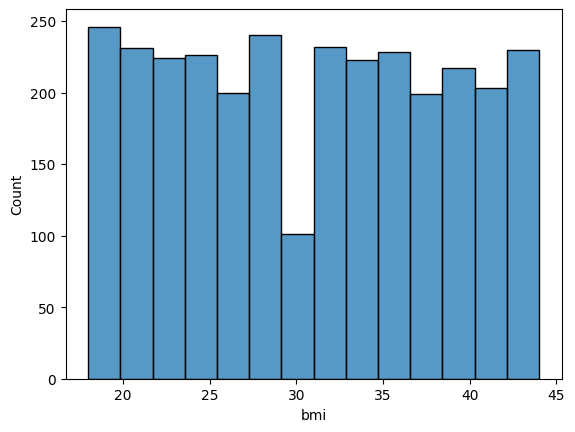

In [ ]:
# analysing bmi
sns.histplot(x = df_cleaned['bmi'])

In [ ]:
# Creating bmi category with some feature
df_cleaned['bmi_category'] = pd.cut(
    df_cleaned['bmi'],
    bins=[0, 18.5, 24.9, 29.9, float('inf')],
    labels=["Underweight", "Normal", "Overweight", "Obese"]
    )

In [ ]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category
0,36,0,28,2,1,20599,1,0,0,Overweight
1,45,0,41,2,0,8918,0,1,0,Obese
2,30,0,38,1,0,7125,1,0,0,Obese
3,38,0,23,4,1,27342,0,1,0,Normal
4,50,1,35,2,0,7190,1,0,0,Obese


In [ ]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['bmi_category'], drop_first=True)

In [ ]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,36,0,28,2,1,20599,1,0,0,False,True,False
1,45,0,41,2,0,8918,0,1,0,False,False,True
2,30,0,38,1,0,7125,1,0,0,False,False,True
3,38,0,23,4,1,27342,0,1,0,True,False,False
4,50,1,35,2,0,7190,1,0,0,False,False,True


In [ ]:
df_cleaned = df_cleaned.astype(int)

In [ ]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,36,0,28,2,1,20599,1,0,0,0,1,0
1,45,0,41,2,0,8918,0,1,0,0,0,1
2,30,0,38,1,0,7125,1,0,0,0,0,1
3,38,0,23,4,1,27342,0,1,0,1,0,0
4,50,1,35,2,0,7190,1,0,0,0,0,1


In [ ]:
# Feature scaling in age, children and bmi only because rest of the data is fine and we have to do operation  in charges so we don't need to touch that, for this we require sklearn
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

col = ['age', 'bmi', 'children']

scaler = StandardScaler()

df_cleaned[col] = scaler.fit_transform(df_cleaned[col])

In [ ]:
# After doing this StandardScaler we can see the age, bmi and children data is between 0 to 1
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northwest,region_southeast,region_southwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-0.394024,0,-0.357591,-0.303361,1,20599,1,0,0,0,1,0
1,0.252506,0,1.301074,-0.303361,0,8918,0,1,0,0,0,1
2,-0.825043,0,0.918305,-0.889001,0,7125,1,0,0,0,0,1
3,-0.250351,0,-0.995539,0.867918,1,27342,0,1,0,1,0,0
4,0.611689,1,0.535536,-0.303361,0,7190,1,0,0,0,0,1


In [ ]:
# Feature selection or extraction
# Pearson correlation calculation
from scipy.stats import pearsonr
selected_feature = ['age', 'is_female', 'bmi', 'children', 'is_smoker','region_northwest', 'region_southeast', 'region_southwest','bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese']

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_feature
}

correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.898941
0,age,0.233699
2,bmi,0.203808
10,bmi_category_Obese,0.176449
3,children,0.132895
7,region_southwest,0.008297
1,is_female,-0.004060
5,region_northwest,-0.006951
6,region_southeast,-0.028205
9,bmi_category_Overweight,-0.082485


In [ ]:
cat_features = [ 'is_female',  'is_smoker','region_northwest', 'region_southeast', 'region_southwest','bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese']

In [ ]:
from scipy.stats import chi2_contingency

alpha = 0.05
df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)
chi2_results  = {}

for col in cat_features:
  consitency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
  chi2_stat, p_val, _, _ = chi2_contingency(consitency)
  decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
  chi2_results[col] = {
      'chi2_statistic': chi2_stat,
      'p_values': p_val,
      'Decision': decision
  }


chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_values')
chi2_df

,chi2_statistic,p_values,Decision
is_smoker,2952.764977,0.0,Reject Null (Keep Feature)
bmi_category_Obese,320.260483,0.0,Reject Null (Keep Feature)
bmi_category_Overweight,129.140799,0.0,Reject Null (Keep Feature)
bmi_category_Normal,74.962572,0.0,Reject Null (Keep Feature)
region_northwest,8.315447,0.039923,Reject Null (Keep Feature)
region_southeast,4.701696,0.19499,Accept Null (Drop Feature)
is_female,4.298942,0.230941,Accept Null (Drop Feature)
region_southwest,2.586467,0.459867,Accept Null (Drop Feature)


In [ ]:
final_df = df_cleaned[['age', 'bmi', 'children', 'is_smoker', 'charges','region_northwest', 'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese']]

In [ ]:
final_df

,age,bmi,children,is_smoker,charges,region_northwest,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-0.394024,-0.357591,-0.303361,1,20599,1,0,1,0
1,0.252506,1.301074,-0.303361,0,8918,0,0,0,1
2,-0.825043,0.918305,-0.889001,0,7125,1,0,0,1
3,-0.250351,-0.995539,0.867918,1,27342,0,1,0,0
4,0.611689,0.535536,-0.303361,0,7190,1,0,0,1
...,...,...,...,...,...,...,...,...,...
2995,0.827198,-1.250719,0.282278,1,26996,0,1,0,0
2996,-0.753207,-0.357591,-0.303361,1,17802,0,0,1,0
2997,0.970872,1.428664,-0.889001,1,32727,0,0,0,1
2998,0.108832,1.683843,0.282278,1,41999,0,0,0,1
